In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import datetime


# Path: exercise.ipynb
data = pd.read_csv('dailyActivity_merged.csv')

In [34]:
# disabling the warning

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # Disable the warning

-- General Information about the dataset --
Columns: ['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

Number of unique Ids: 33
ActivityDate range: 4/12/2016 to 5/12/2016
ActivityDate format: %-m/%-d/%Y

In [35]:
print(data.head())

# Print summary of the dataset
print(data.info())

# Display descriptive statistics table
print(data.describe())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

In [50]:
# default function to make a bar plot

def makeBarPlot(data, header, group_by='Id'):
    
    result = data.groupby(group_by)[header].mean()

    result.plot(kind='bar', figsize=(8, 6))
    plt.title(f'Total {header} by Unique {group_by}')
    plt.xlabel(group_by)
    plt.ylabel(header)
    plt.show()

In [37]:
# default function to visualize time series

def makeTimeSeries(data, cols, id=None, group_by=None):
    if group_by is not None:
        for col in cols:
            data = data.groupby(group_by)[col].sum()    
    data = data[data['Id'] == id]
    plt.figure(figsize=(8,6))
    data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])
    plt.plot(data['ActivityDate'], data[cols], label=cols, marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel(f'{cols}')
    plt.title(f'{cols} Over Time - {id}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

In [38]:
data['Day'] = 'None'
for i in range(len(data)):
    dateNow = datetime.datetime.strptime(data['ActivityDate'].iloc[i], "%m/%d/%Y")
    day = dateNow.strftime("%A")
    data.loc[data.index[i], 'Day'] = day

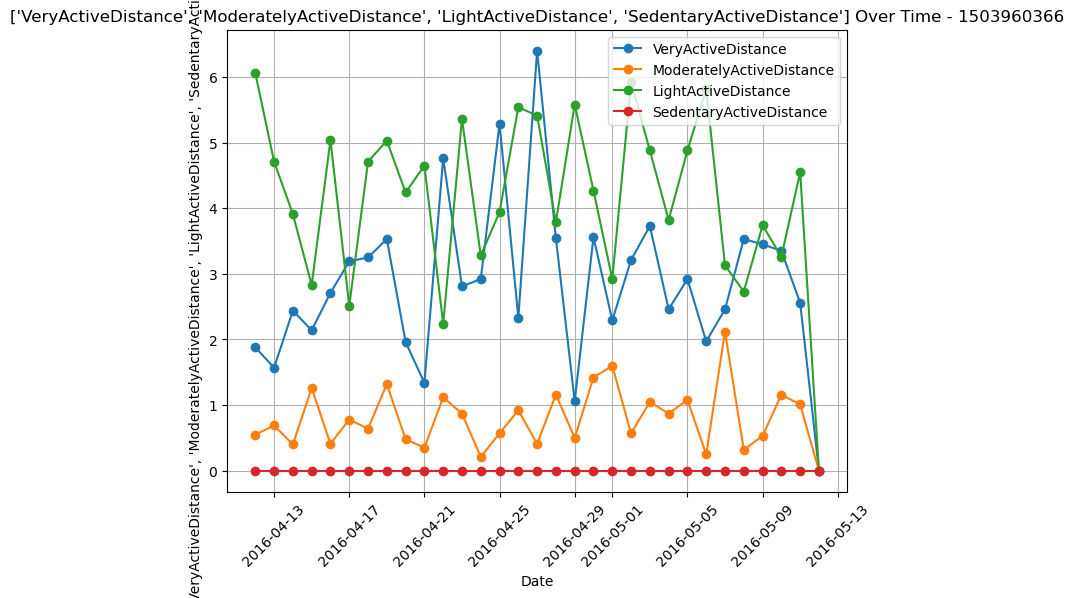

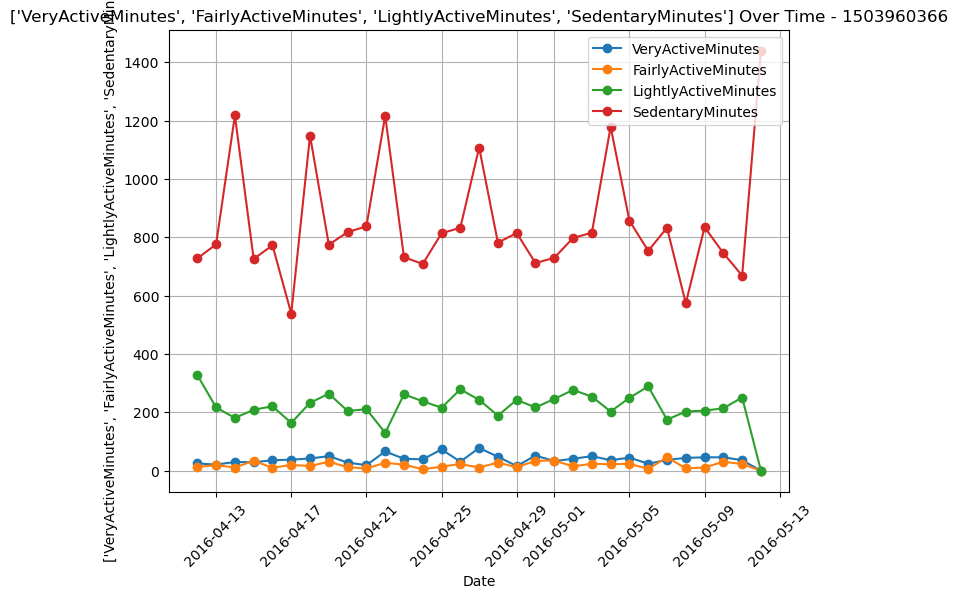

In [39]:
# time series for each day of the duration

cols = ['VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance']
makeTimeSeries(data, cols, 1503960366)

cols = ['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
makeTimeSeries(data, cols, 1503960366)

In [40]:
# default function to make a histogram

def makeHistogram(data, header, group_by='Id'):
    plt.figure(figsize=(8, 6))
    plt.hist(data[header], bins=20, color='blue')
    plt.title(f'{header} Distribution')
    plt.xlabel(header)
    plt.ylabel('Count')
    plt.show()

In [59]:
# get data for a particular id based on days of week
# mostly bar plots

def getParticular(data, id): 
        newData = data[data['Id'] == id]
        newData['Day'] = 'None'
        for i in range(len(newData)):
            dateNow = datetime.datetime.strptime(newData['ActivityDate'].iloc[i], "%m/%d/%Y")
            day = dateNow.strftime("%A")
            newData.loc[newData.index[i], 'Day'] = day
            
        plt.figure(figsize=(8, 6))
        plt.subplot(2, 1, 1)
        makeBarPlot(newData, 'Calories', group_by='Day')
        plt.subplot(2, 1, 2)
        makeBarPlot(newData, 'TotalSteps', group_by='Day')
        plt.show()
        

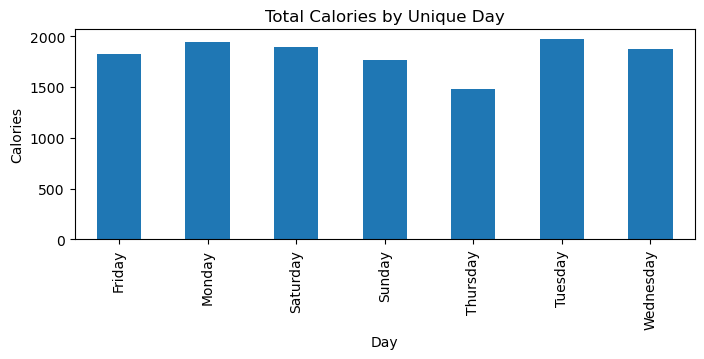

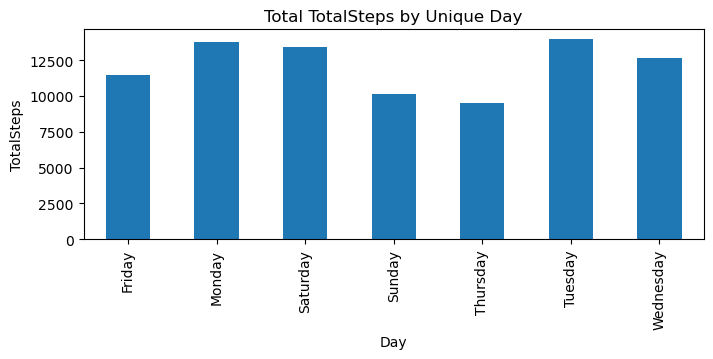

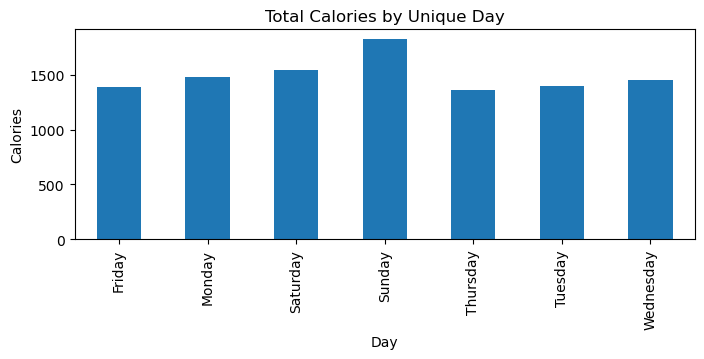

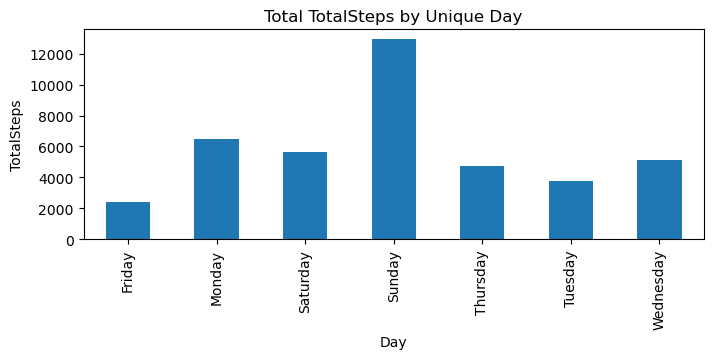

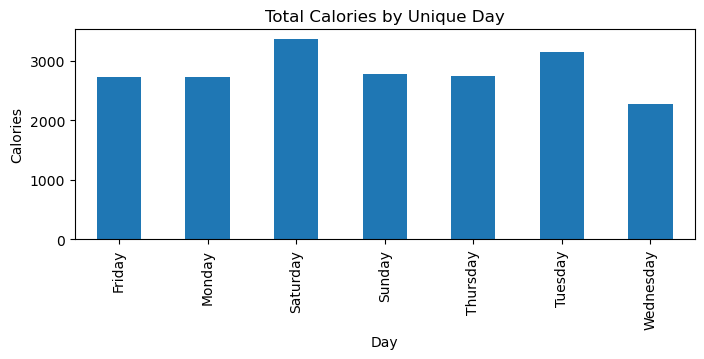

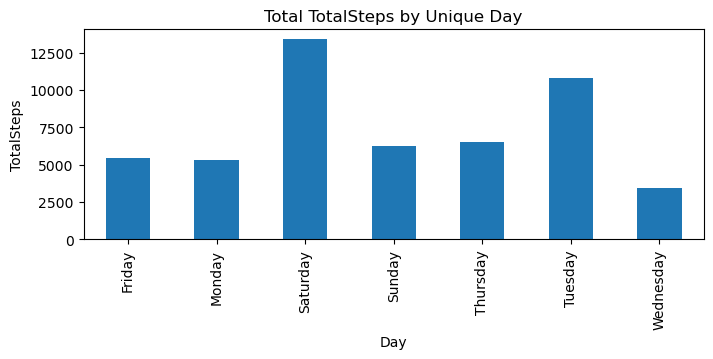

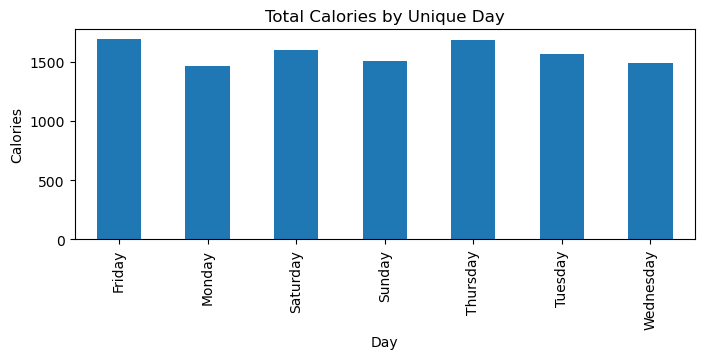

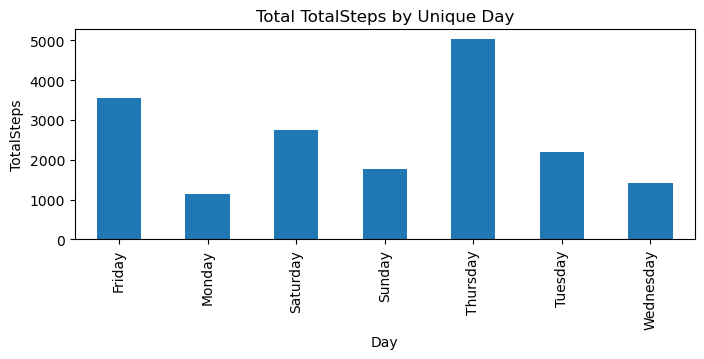

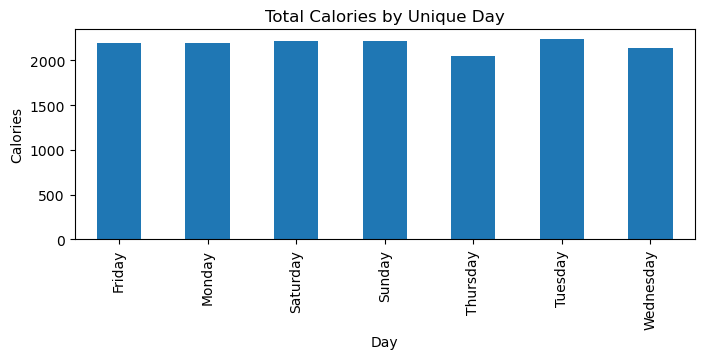

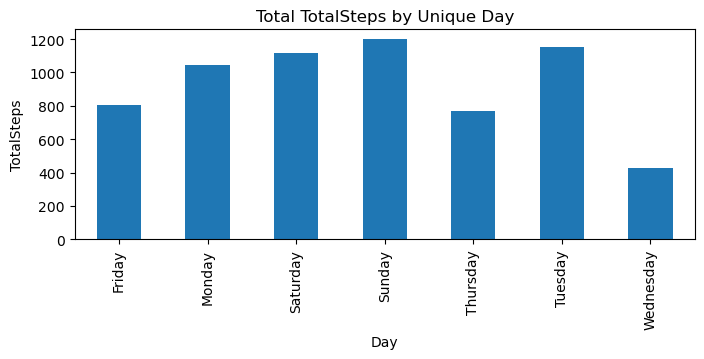

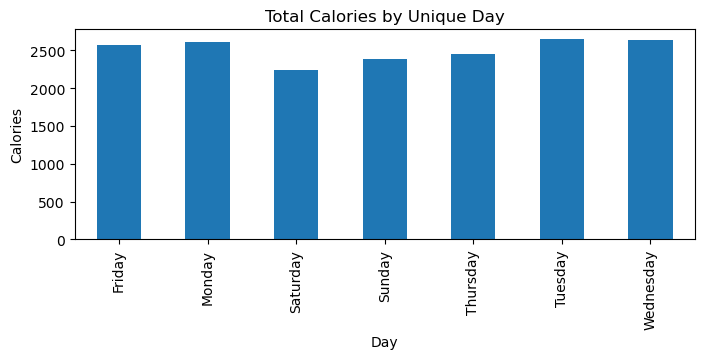

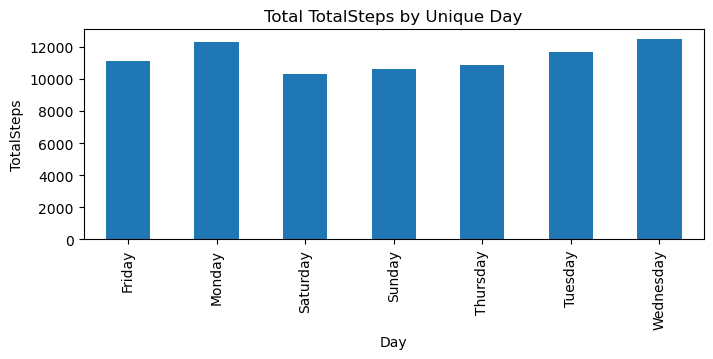

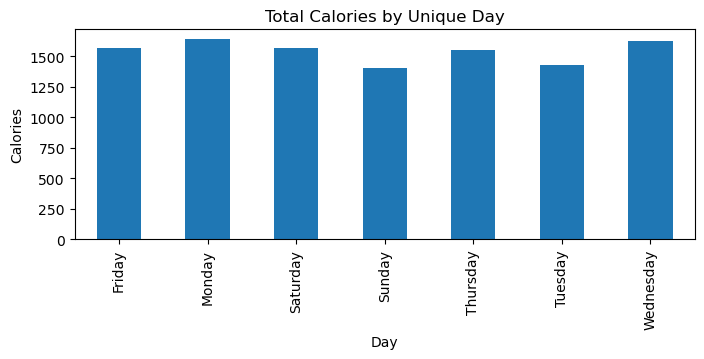

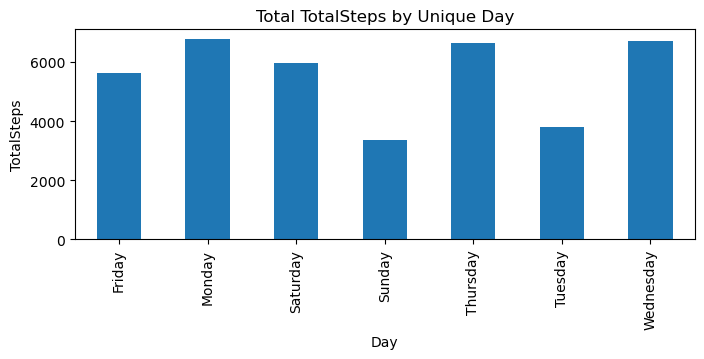

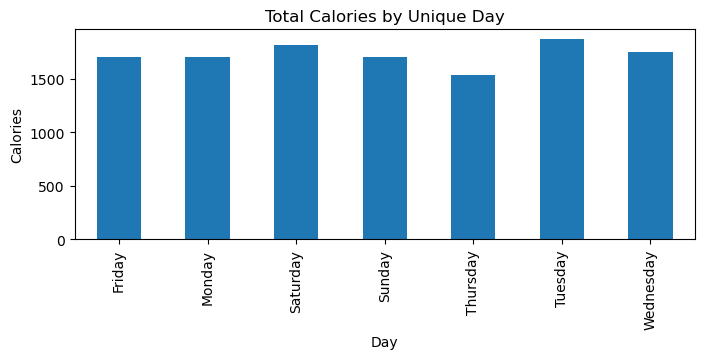

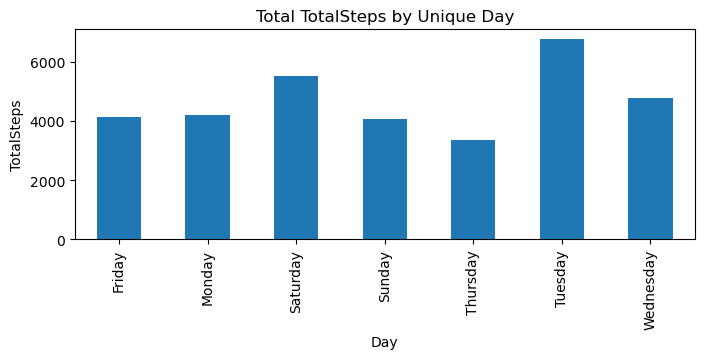

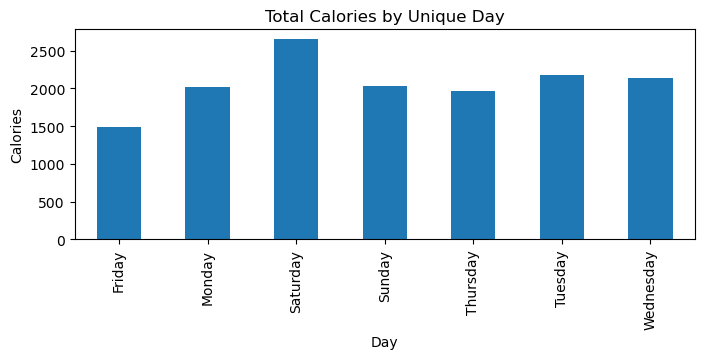

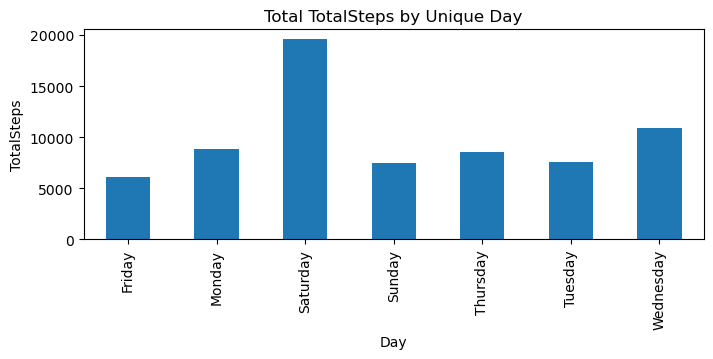

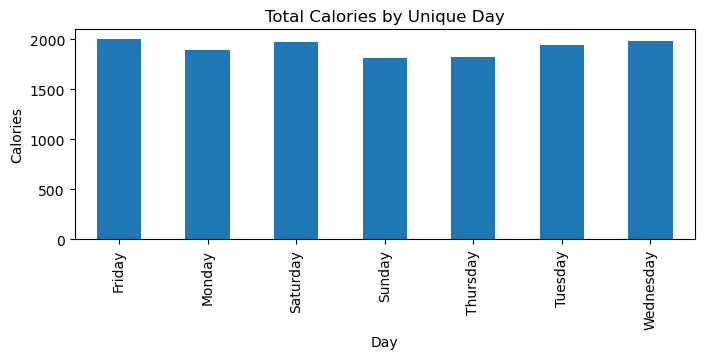

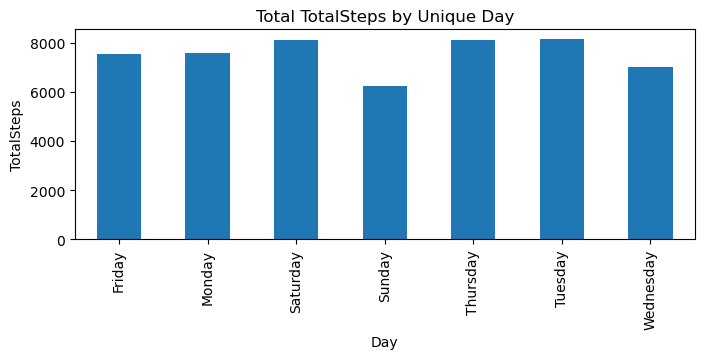

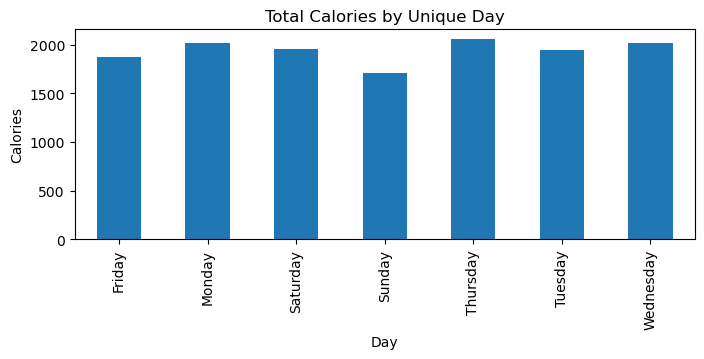

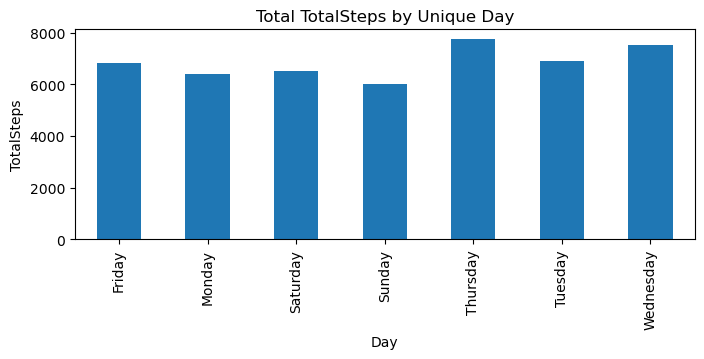

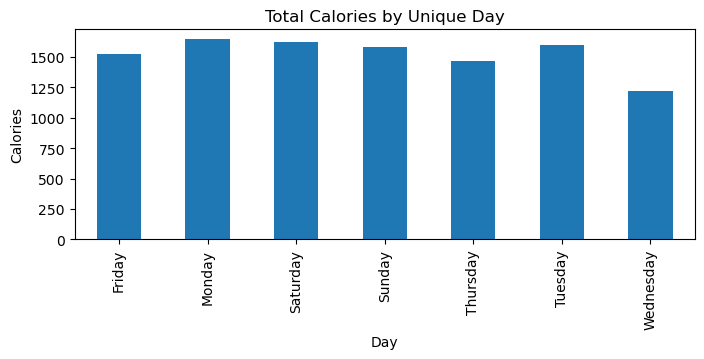

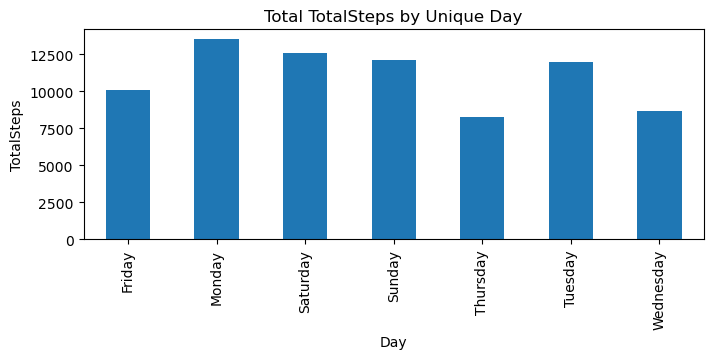

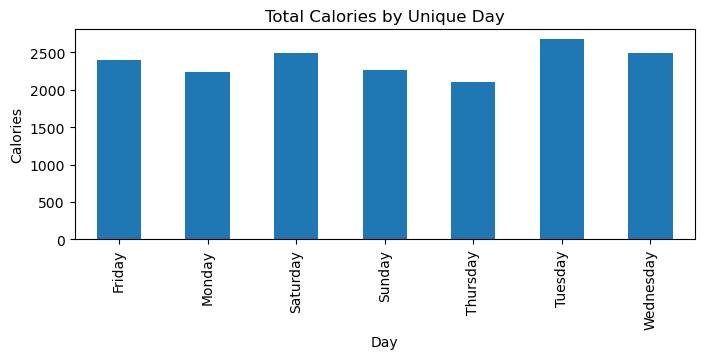

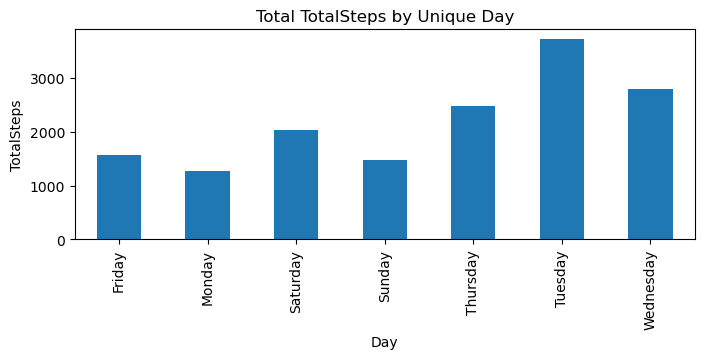

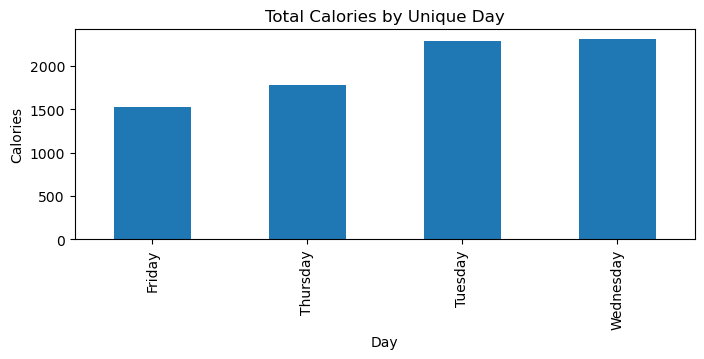

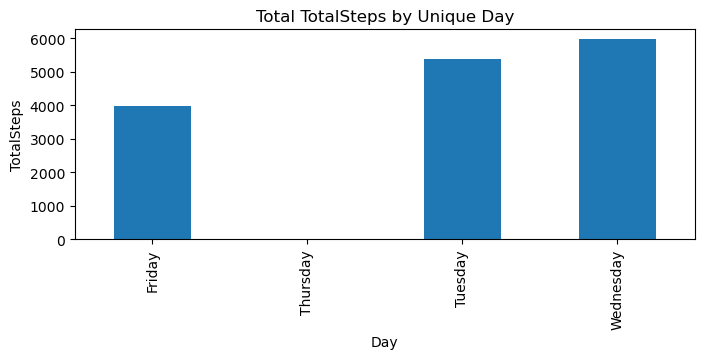

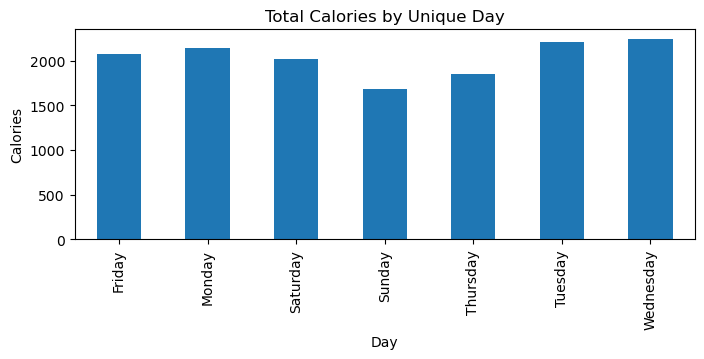

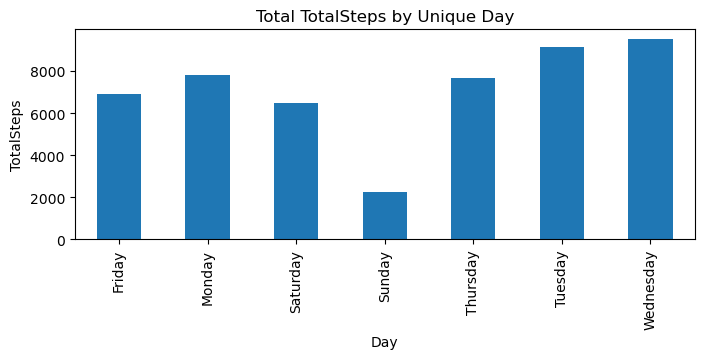

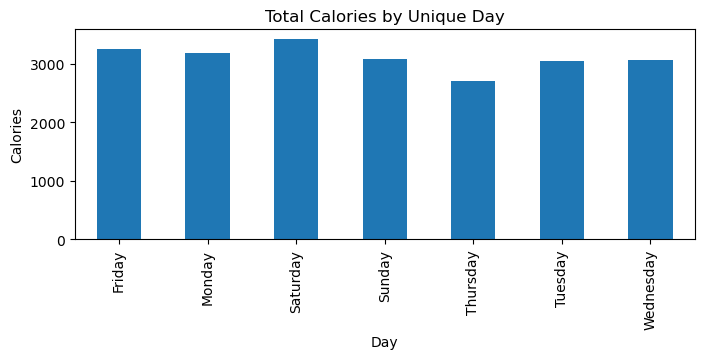

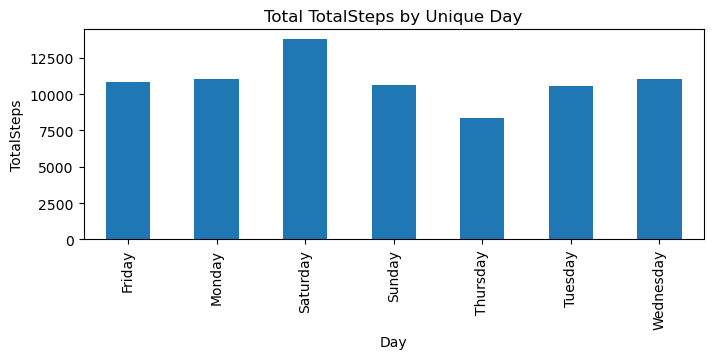

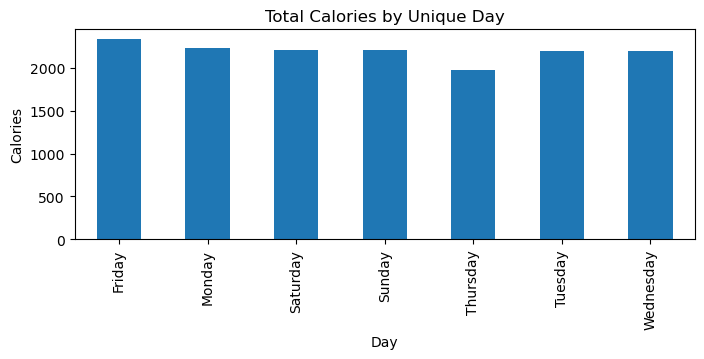

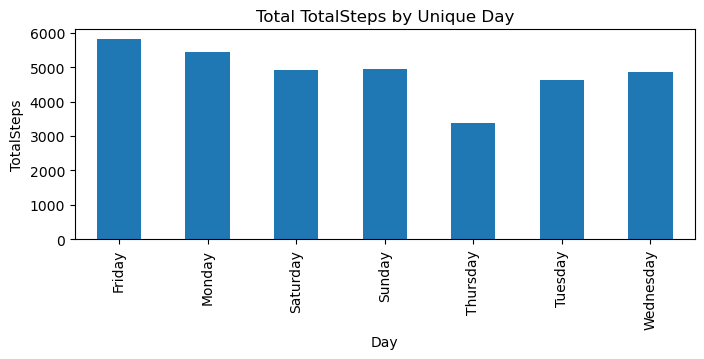

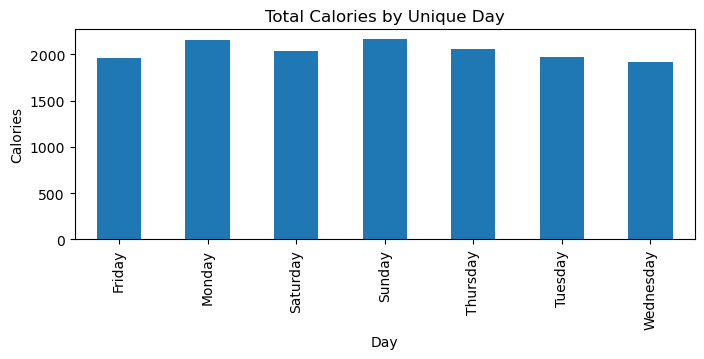

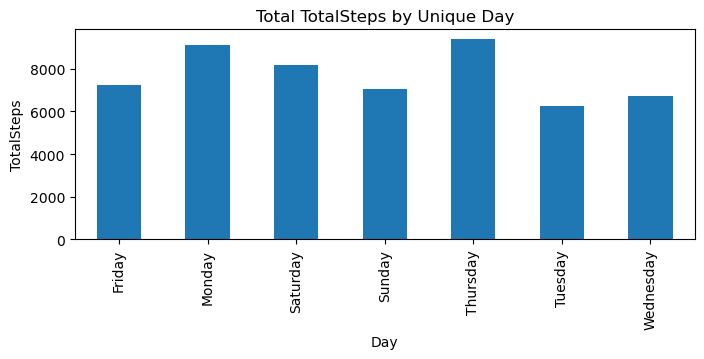

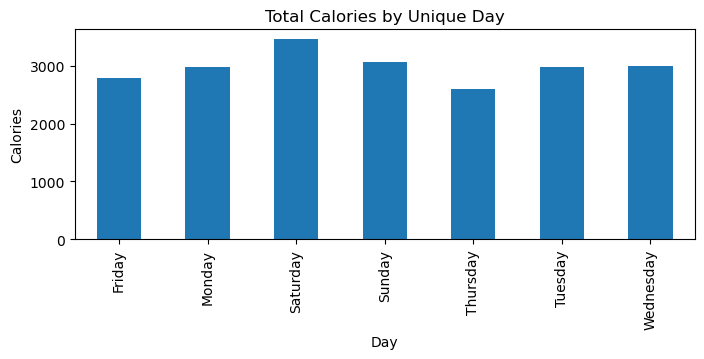

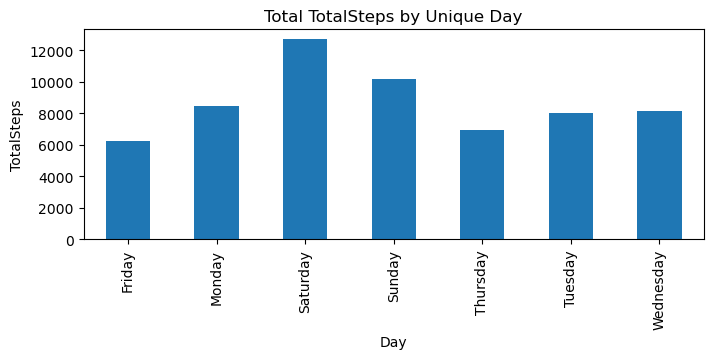

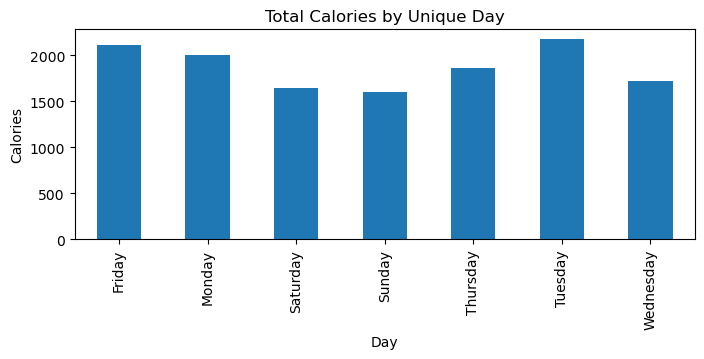

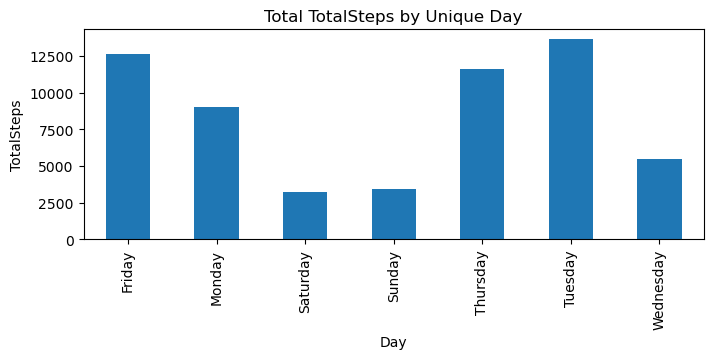

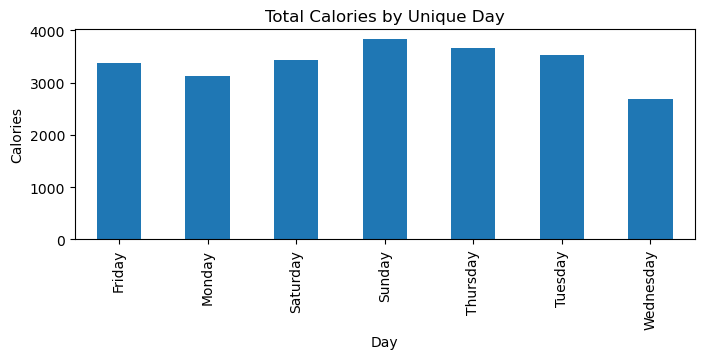

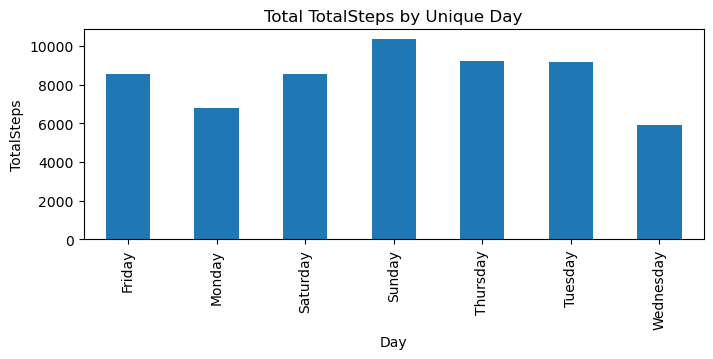

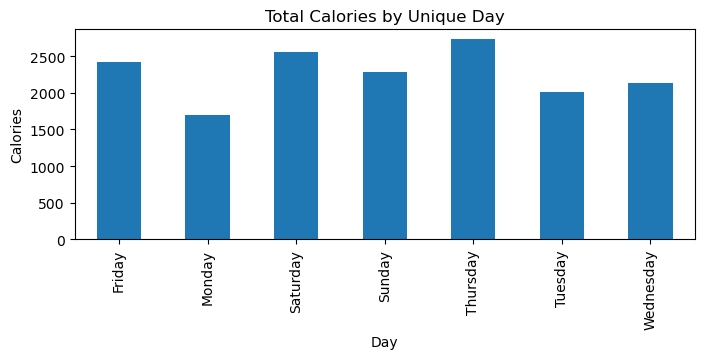

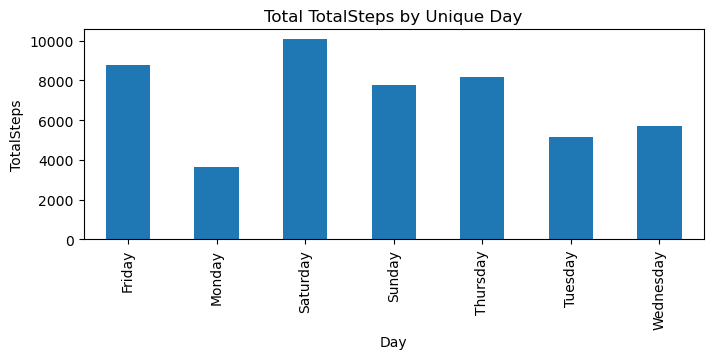

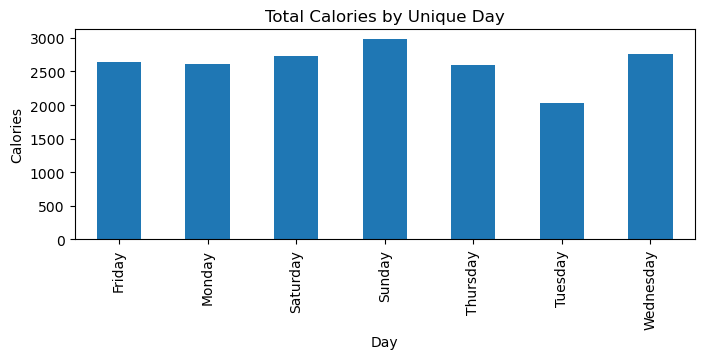

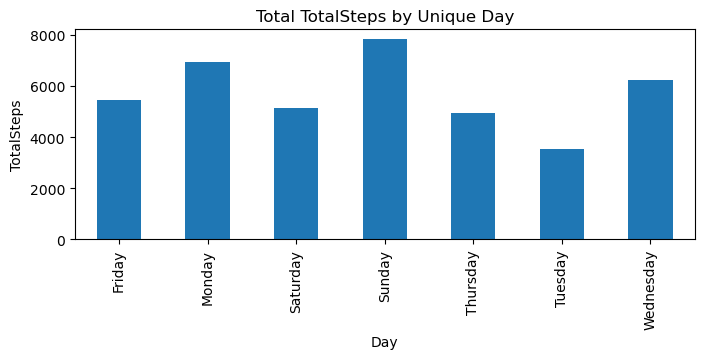

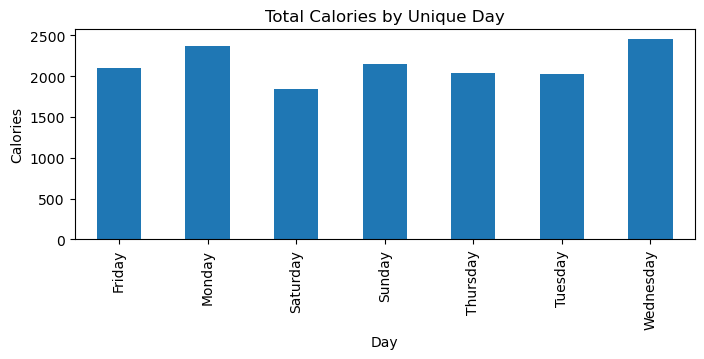

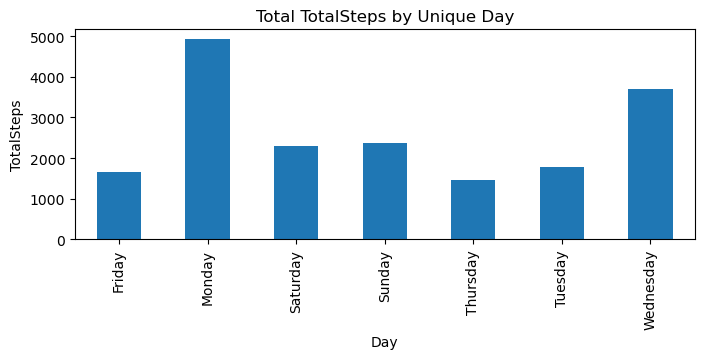

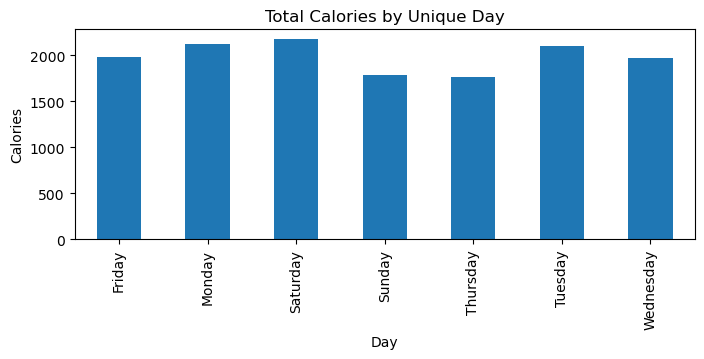

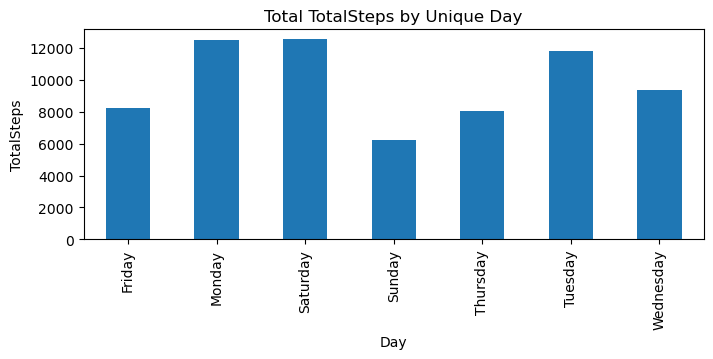

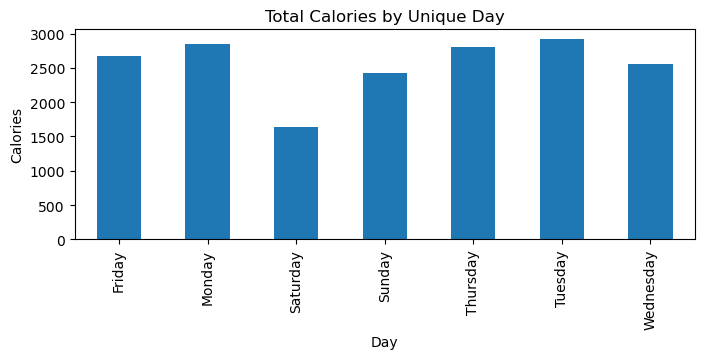

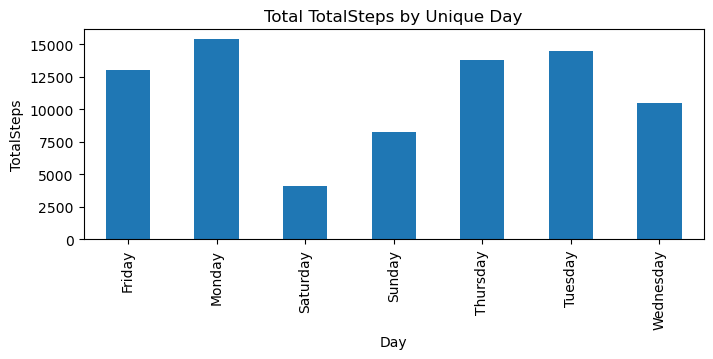

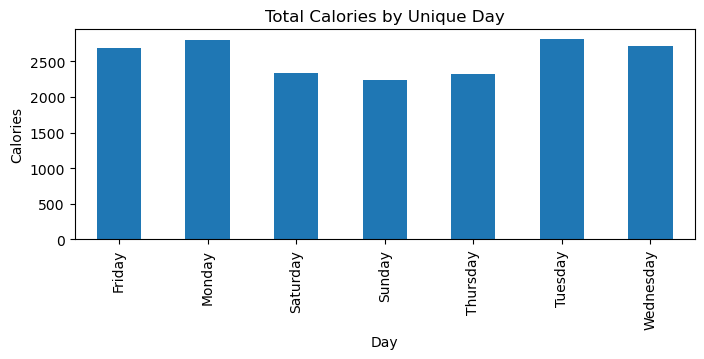

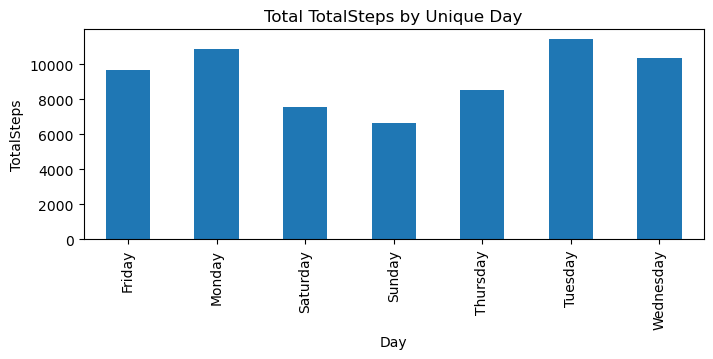

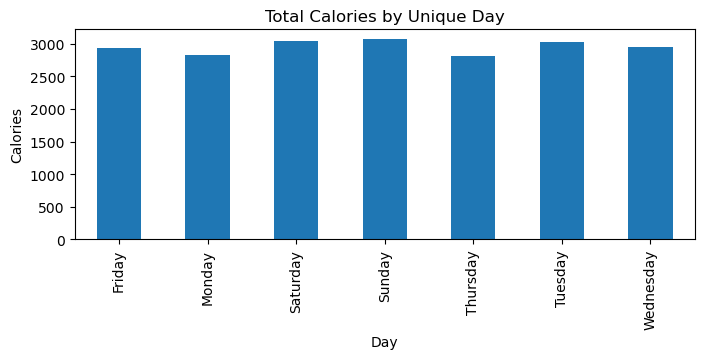

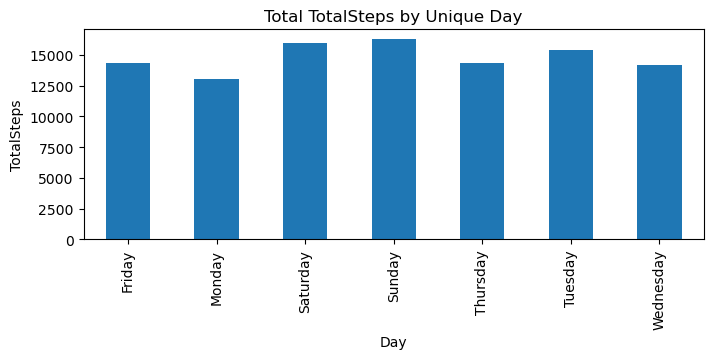

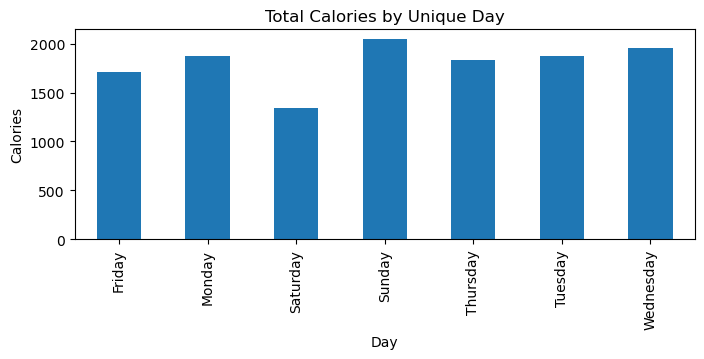

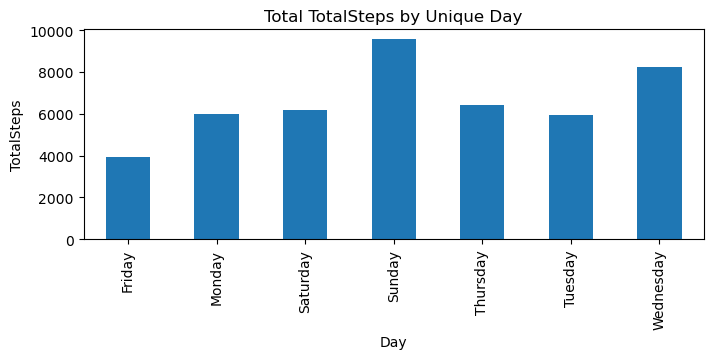

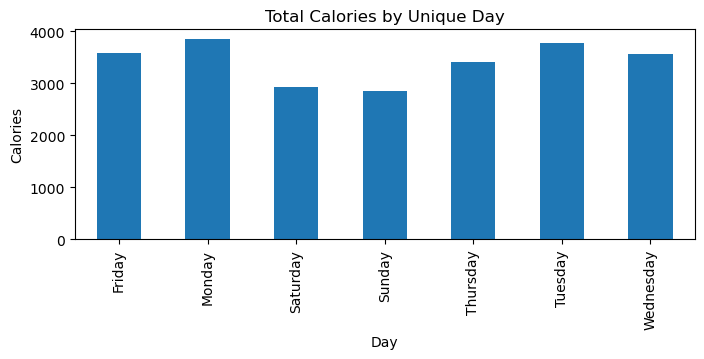

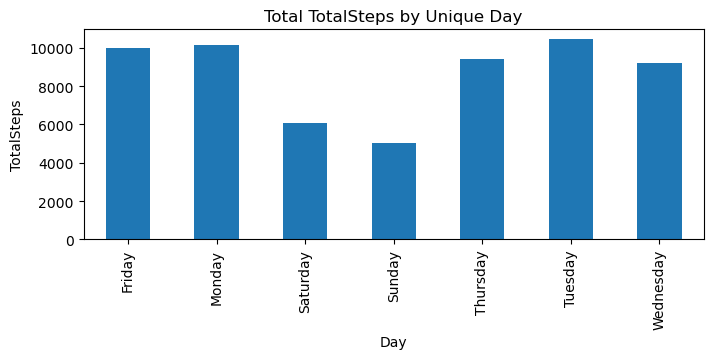

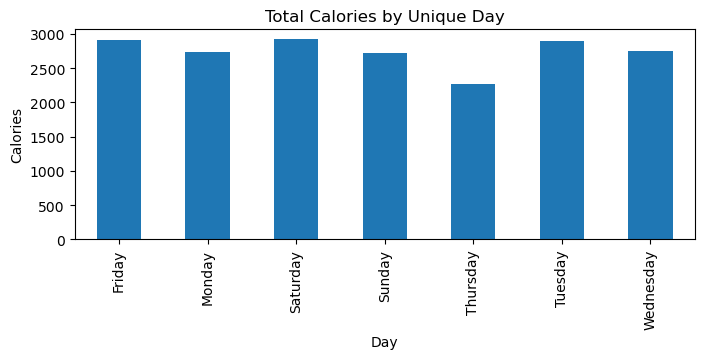

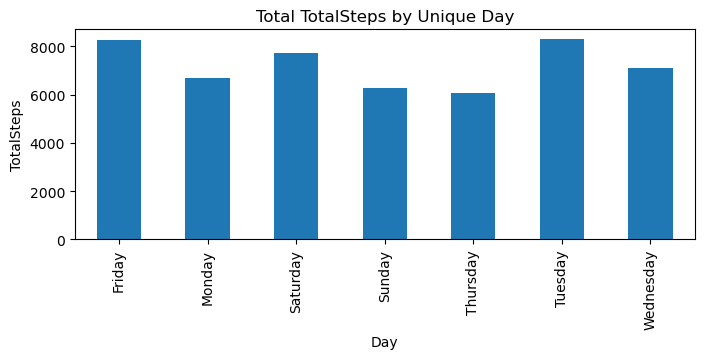

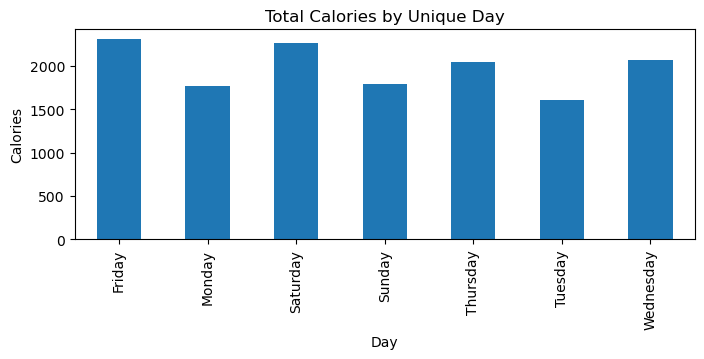

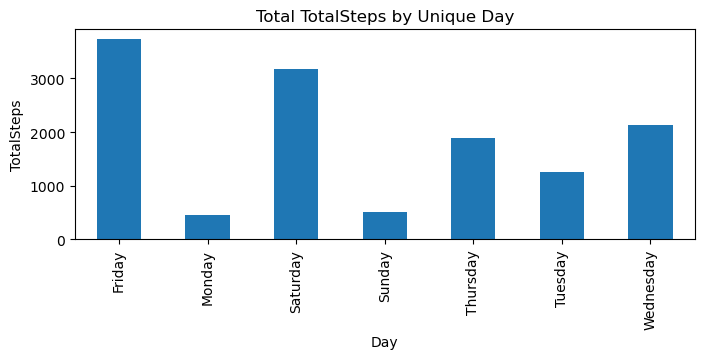

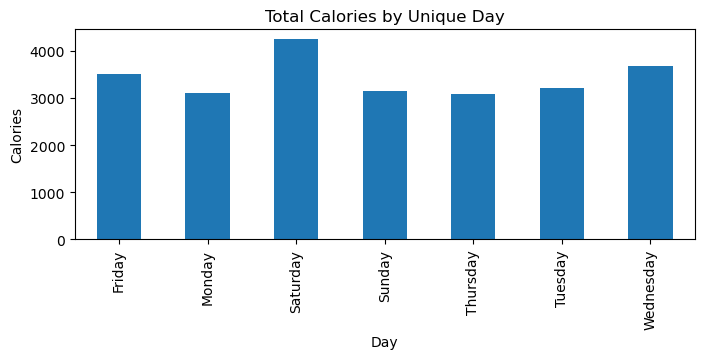

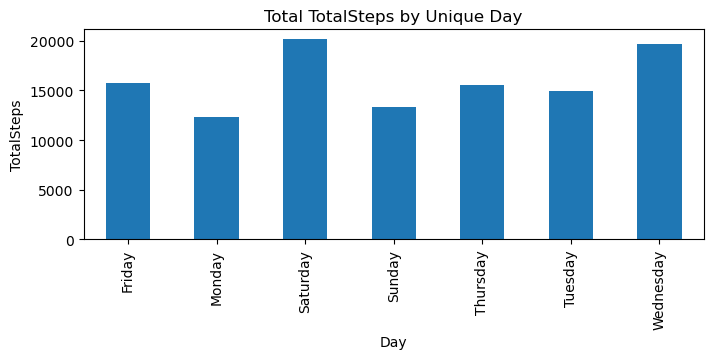

In [60]:
for x in data['Id'].unique():
    getParticular(data, x)

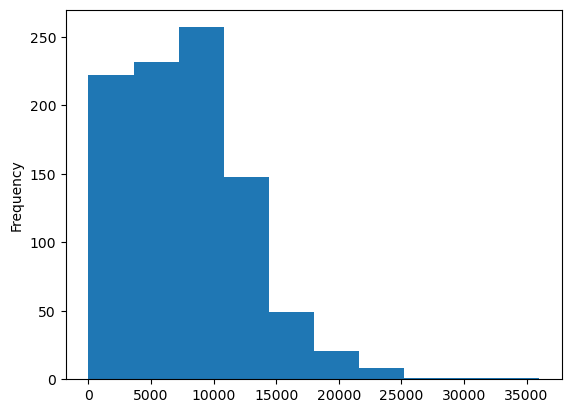

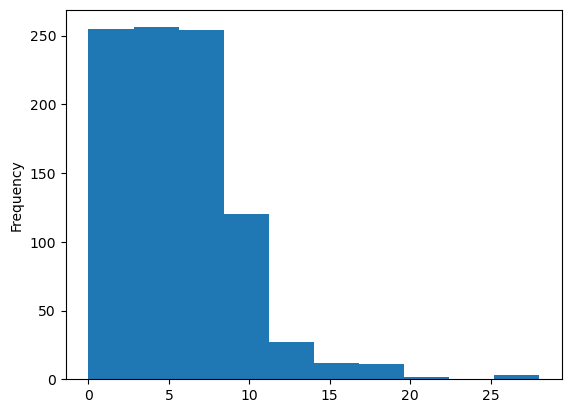

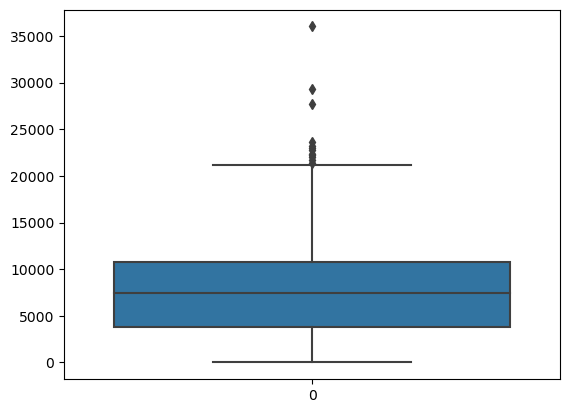

In [43]:
# Univariate Analysis

# Plot histogram for TotalSteps
data['TotalSteps'].plot.hist()
plt.show()

# similarly, plot for other continuous features can be drawn.
# example:
data['TotalDistance'].plot.hist()
plt.show()

# Box plot for detecting outliers
sns.boxplot(data['TotalSteps'])
plt.show()

# similarly, boxplots can be drawn for all continuous features
plt.show()


In [8]:
# Bivariate Analysis
# Correlation matrix
corr_mat = data.corr()

fig = plt.figure(figsize=(8, 6))
# Create an interactive heatmap with labels
fig = px.imshow(corr_mat, x=corr_mat.columns, y=corr_mat.columns, color_continuous_scale='Viridis')

fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis = dict(tickangle = 90),
    yaxis = dict(tickangle = 0) 
)


fig.show()



C:\Users\SMRUTI\AppData\Local\Temp\ipykernel_28620\3106293251.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 800x600 with 0 Axes>

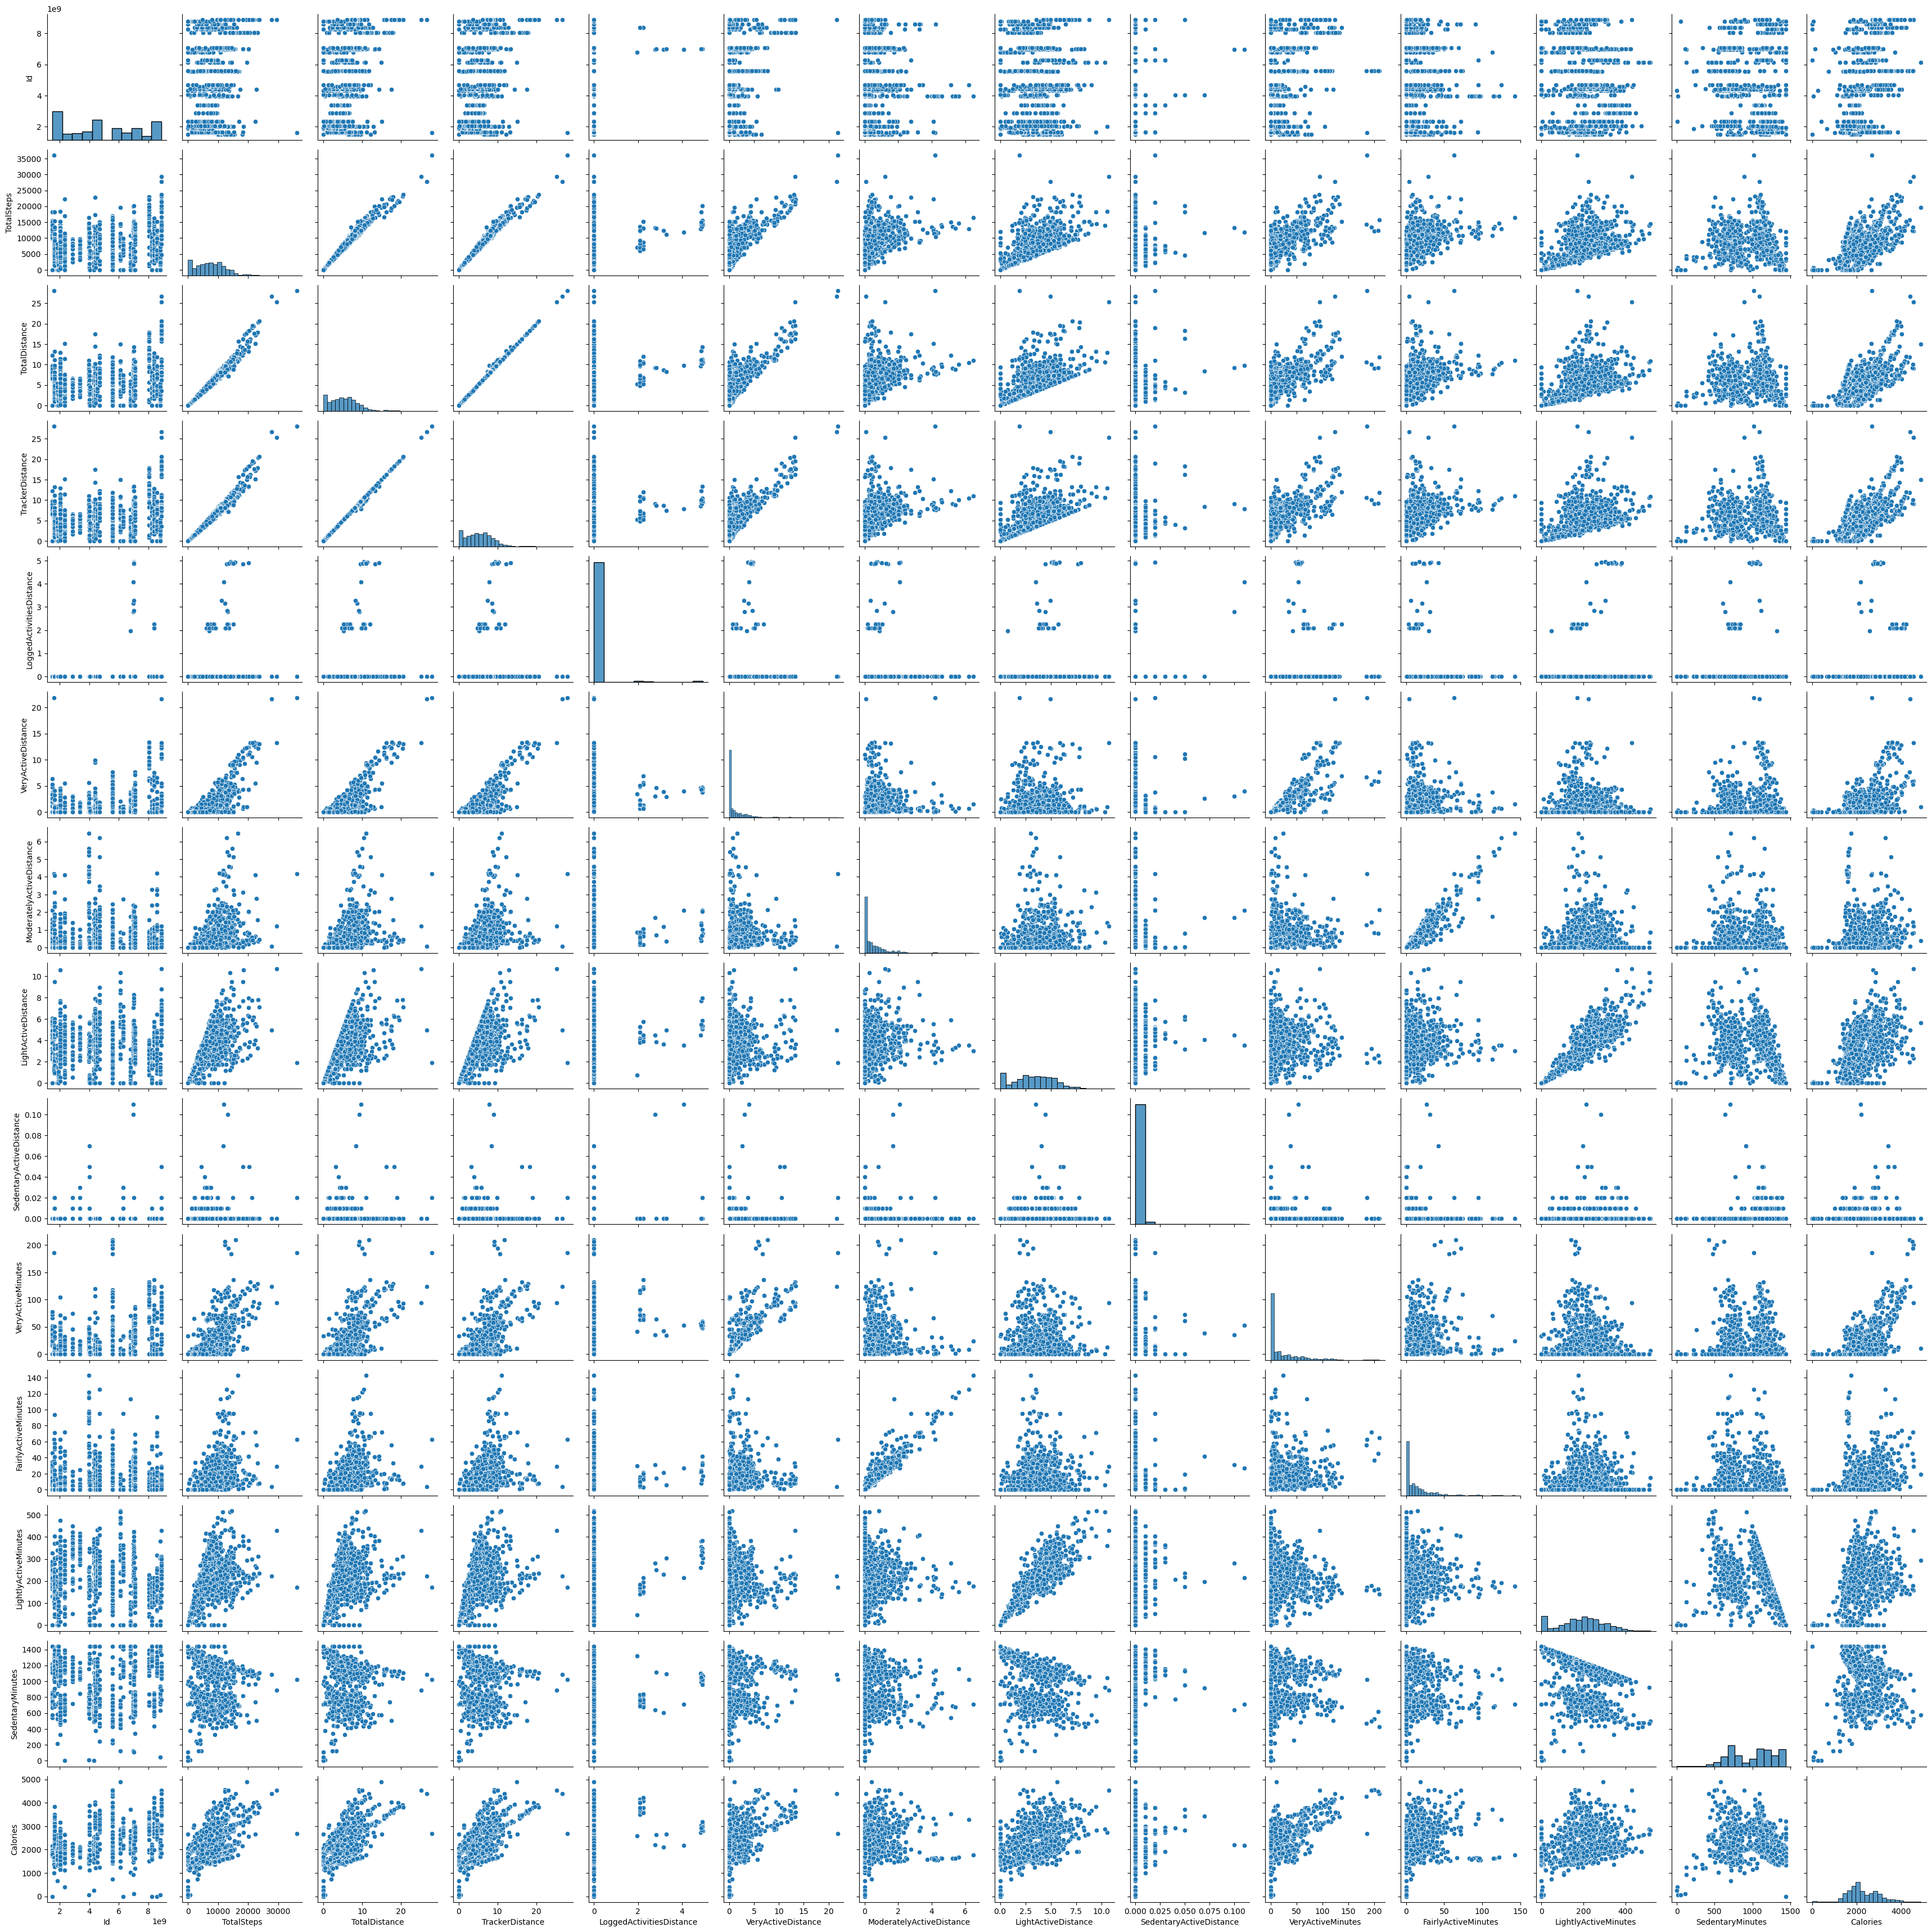

In [45]:
# Pairplot to visualize relationship between all different features 
sns.pairplot(data)
plt.show()


In [46]:

def makeHistogram(data):

    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
    ax = axes[0]
    cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
    ax.hist(data[cols], bins=10, edgecolor='k', alpha=0.7, label=cols)
    ax.set_title("Minutes v/s Frequency")
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Frequency')
    ax.legend()


    # Create a histogram for calories
    ax = axes[1]
    ax.hist(data['Calories'], bins=10, edgecolor='k', alpha=0.7)
    ax.set_title('Calories')
    ax.set_xlabel('Calories')
    ax.set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

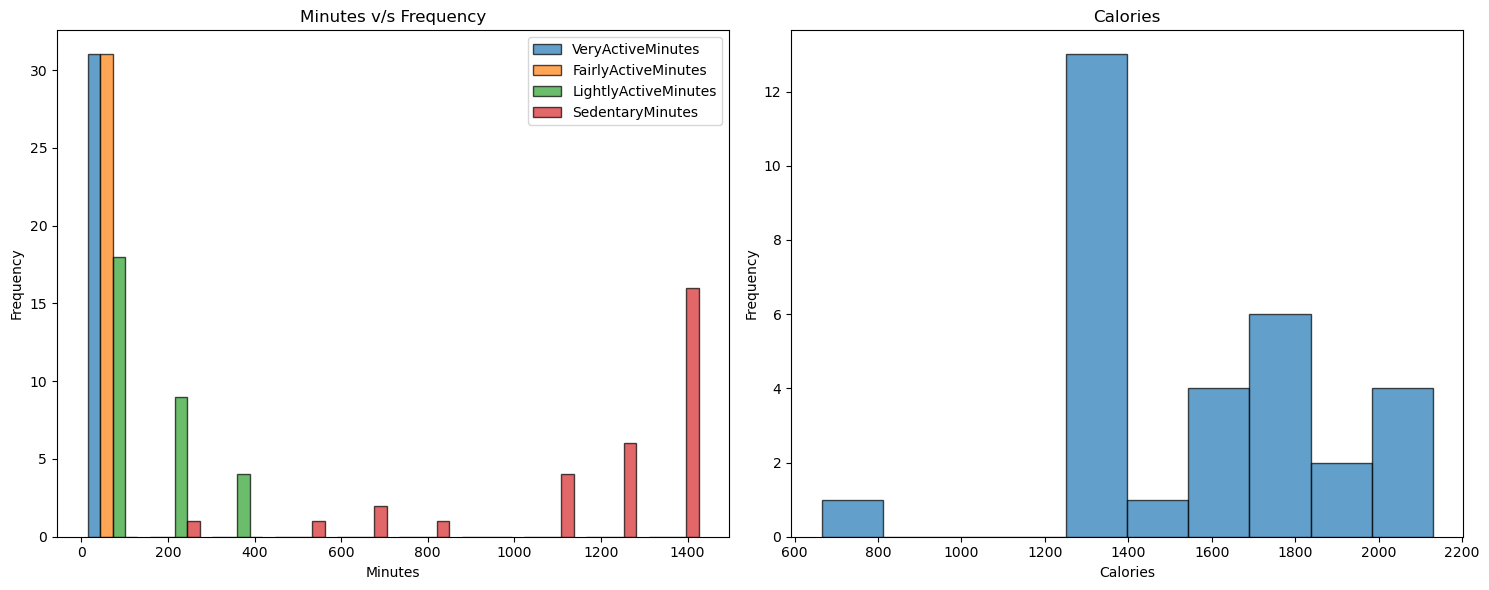

In [47]:
newData = data[data['Id']==1844505072]  
makeHistogram(newData)


In [48]:
# make scatter plot based on two variables and add labels based on 'Id'
# using jitter
# using this now

from sklearn.preprocessing import LabelEncoder

def makeScatterPlot(data, x, y):
    # Create color map for unique 'Id'
    le = LabelEncoder()
    colormap = le.fit_transform(data['Id'].values)
    
    # Create jitter (noise)
    jit_x = np.random.normal(0, 0.1, data[x].shape)
    jit_y = np.random.normal(0, 0.1, data[y].shape)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x] + jit_x, data[y] + jit_y, c=colormap, alpha=0.5)

    # Add labels based on 'Id'

    # Create a legend
    patches = [plt.Line2D([0],[0], marker='o', color='gray', linestyle='', 
                          markerfacecolor=(plt.get_cmap("viridis")(le.transform([i])[0]/(len(set(data['Id'].values)) - 1)) 
                         )) for i in sorted(list(set(data['Id'].values)))]

    plt.legend(handles=patches, labels=sorted(list(set(data['Id'].values))))

    plt.title(f'Scatter Plot of {x} vs. {y} with Jitter')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


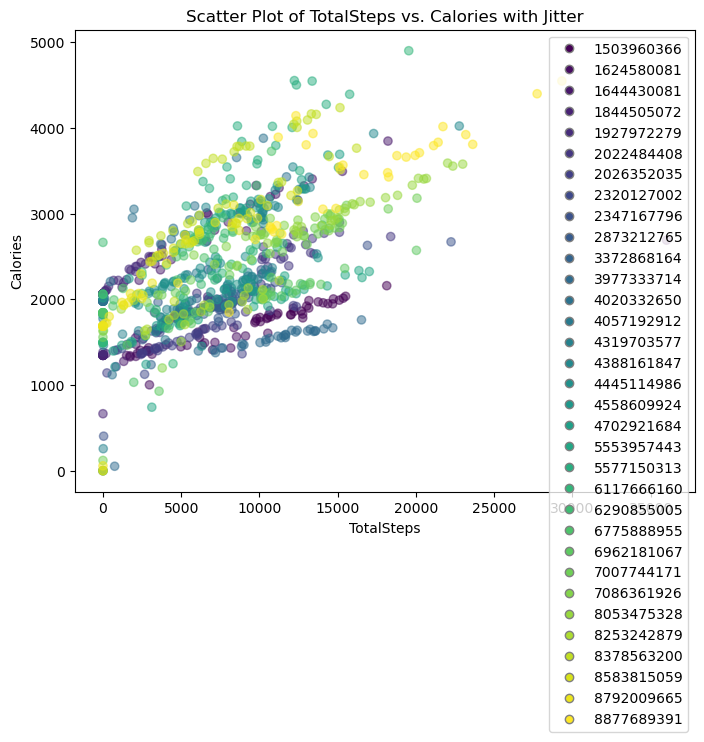

In [49]:
makeScatterPlot(data, 'TotalSteps', 'Calories')